In [160]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [161]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [162]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


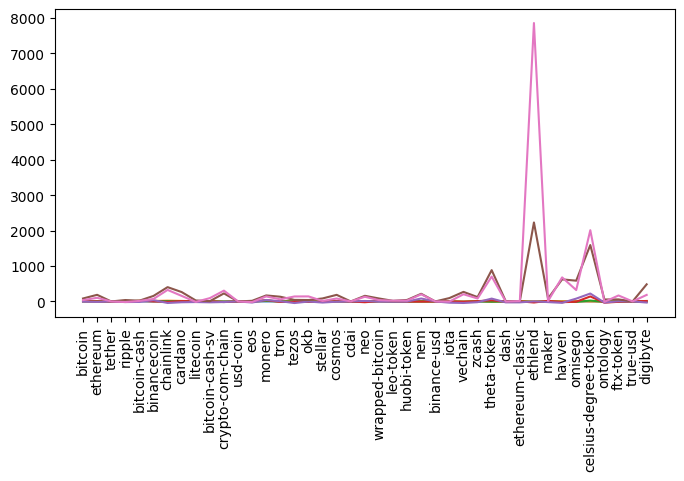

In [163]:
# Plot your data to see what's in your DataFrame
plt.figure(figsize=(8,4))
plt.plot(df_market_data.index, df_market_data.values)
plt.xticks(rotation=90)
plt.show()

---

### Prepare the Data

In [164]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler().fit_transform(df_market_data)

In [165]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(scaler, columns=df_market_data.columns)

# Copy the crypto names from the original data
df_market_data_scaled["coin_id"] = df_market_data.index
# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index("coin_id")

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [166]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [167]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [168]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


<Axes: xlabel='k'>

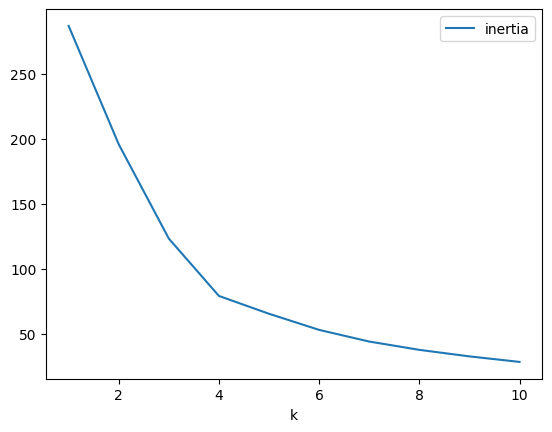

In [169]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.plot('k', 'inertia')

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** Considering the elbow curve, the best value for 'k' seems to be 3, since the line that displays the inertia values decreases significantly from that point on.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [170]:
# Initialize the K-Means model using the best value for k
# Define the model Kmeans model using the optimal value of k for the number of clusters.
k_segment = KMeans(n_clusters=3, random_state=1)

In [171]:
# Fit the K-Means model using the scaled data
k_segment.fit(df_market_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [172]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_pred = k_segment.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
k_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=int32)

In [173]:
# Create a copy of the DataFrame
market_data_k_df = df_market_data_scaled.copy()

In [174]:
# Add a new column to the DataFrame with the predicted clusters
market_data_k_df['k_seg'] = k_pred

# Display sample data
market_data_k_df.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,k_seg
coin_id,,,,,,,,
huobi-token,-0.052032,-0.457229,0.032522,-0.184489,-0.070809,-0.451982,-0.262140,1
usd-coin,0.034352,-0.733026,-0.023140,-0.065775,0.002925,-0.550599,-0.282232,1
wrapped-bitcoin,0.515453,0.461843,0.769975,0.224045,-0.074674,-0.355054,-0.251623,1
stellar,-0.277543,-0.385209,-0.153243,-0.371816,-0.656403,-0.353387,-0.270874,1
neo,0.286546,-0.326301,-1.212670,-0.903134,0.290970,-0.181187,-0.175550,1
tron,0.130050,-0.041018,0.147155,-0.543776,0.120116,-0.241118,-0.234014,1
digibyte,1.217453,-0.607714,-0.907066,0.449939,-0.662530,0.572367,-0.132482,1
crypto-com-chain,0.331280,-1.614844,-1.054521,-0.729931,-0.350155,-0.022866,-0.034570,1
monero,0.262723,1.792602,2.202665,1.437842,0.893865,-0.155893,-0.167644,1


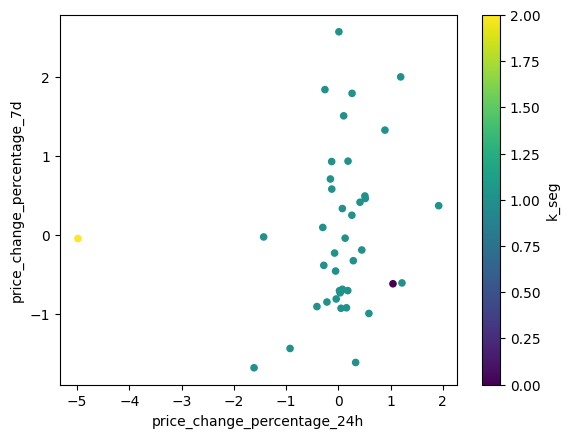

In [175]:
# Create a scatter plot using hvPlot by setting - Used Matplotlib
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot = market_data_k_df.plot.scatter(
    "price_change_percentage_24h",
    "price_change_percentage_7d",
    c='k_seg',
    cmap="viridis")

plt.show()


---

### Optimize Clusters with Principal Component Analysis.

In [176]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [177]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
pca_market_data = pca.fit_transform(df_market_data_scaled)
# View the first five rows of the DataFrame.
pca_market_data[0:5,]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [178]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

total_variance = sum(explained_variance)

print(explained_variance)
print(f"Total Explained Variane: {total_variance:.4f}")

[0.3719856  0.34700813 0.17603793]
Total Explained Variane: 0.8950


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variane: 0.8950


In [179]:
import numpy as np
loadings = pca.components_
absolute_loadings = np.abs(loadings)
most_important_features = np.argmax(absolute_loadings, axis=1)
for component, feature_idx in enumerate(most_important_features):
    feature_name = df_market_data_scaled.columns[feature_idx]  # Assuming you have column names
    print(f"Component {component+1}: Most important feature is {feature_name}")

Component 1: Most important feature is price_change_percentage_200d
Component 2: Most important feature is price_change_percentage_30d
Component 3: Most important feature is price_change_percentage_7d


In [180]:
# Create a new DataFrame with the PCA data.
pca_market_data_df = pd.DataFrame(pca_market_data, columns=['PCA1', 'PCA2', 'PCA3'])

# Creating a DataFrame with the PCA data
# pca_market_data_df.sample(10)

# Copy the crypto names from the original data
pca_market_data_df["coin_id"] = df_market_data.index

# Set the coinid column as index
pca_market_data_df.set_index("coin_id", inplace=True)

# Display sample data
pca_market_data_df.sample(10)

,PCA1,PCA2,PCA3
coin_id,,,
havven,0.865762,-2.261882,0.275583
tether,-0.433070,-0.168126,-0.641752
monero,0.060499,2.909404,1.498571
litecoin,-0.649468,0.432165,0.600303
ethereum,-0.458261,0.458466,0.952877
true-usd,-0.458131,-0.135734,-0.635284
cardano,-0.345600,0.729439,1.478013
leo-token,-0.413296,-0.674115,-1.076628
usd-coin,-0.438408,-0.175337,-0.663388


---

### Find the Best Value for k Using the PCA Data

In [181]:
# Create a list with the number of k-values from 1 to 11
k_pca = list(range(1, 11))

In [182]:
# Create an empty list to store the inertia values
inertia_pca =[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `pca_market_data_df`
# 3. Append the model.inertia_ to the inertia list

for i in k_pca:
    k_pca_model = KMeans(n_clusters=i, random_state=0)
    k_pca_model.fit(pca_market_data_df)
    inertia_pca.append(k_pca_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [183]:
# Create a dictionary with the data to plot the Elbow curve
elbow_pca_data = {"k_pca": k_pca, "inertia_pca": inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve
df_pca_elbow = pd.DataFrame(elbow_pca_data)
df_pca_elbow.head(10)

,k_pca,inertia_pca
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.618972
6,7,21.182776
7,8,17.389823
8,9,13.593650
9,10,10.559358


<Axes: xlabel='k_pca'>

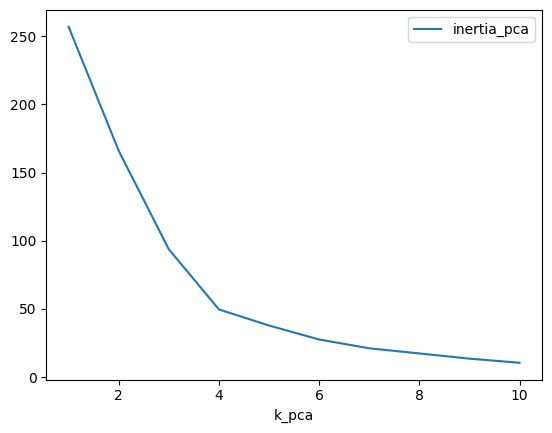

In [184]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_pca_elbow.plot('k_pca', 'inertia_pca')

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**This plot looks a lot litke the original, it seems that the point where the inertia values significantly decrease is between 3 and 4, but closer to 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The data frame has a small difference in the intertia amounts compared to the original data, so has the plot.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [185]:
# Initialize the K-Means model using the best value for k
k_pca_segment = KMeans(n_clusters=4, random_state=1)

In [186]:
# Fit the K-Means model using the PCA data
k_pca_segment.fit(pca_market_data_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [187]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_pca_pred = k_pca_segment.predict(pca_market_data_df)

# Print the resulting array of cluster values.
k_pca_pred


array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [188]:
# Create a copy of the DataFrame with the PCA data
market_data_k_pca_df = pca_market_data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_data_k_pca_df['k_pca_seg'] = k_pca_pred

# Display sample data
market_data_k_pca_df.sample(10)


,PCA1,PCA2,PCA3,k_pca_seg
coin_id,,,,
digibyte,-0.297910,-0.191126,-0.909602,0
cardano,-0.345600,0.729439,1.478013,1
stellar,-0.489015,-0.732719,-0.062543,0
tether,-0.433070,-0.168126,-0.641752,0
tron,-0.393352,-0.108192,-0.012756,0
theta-token,2.676868,-0.013954,-1.965207,0
ripple,-0.471835,-0.222660,-0.479053,0
havven,0.865762,-2.261882,0.275583,0
wrapped-bitcoin,-0.604265,0.827398,0.439316,1


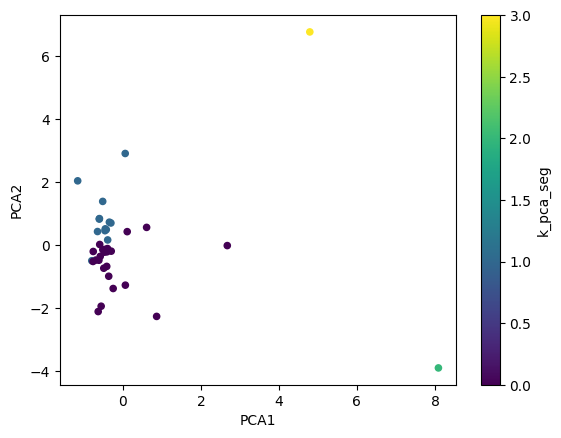

In [189]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot = market_data_k_pca_df.plot.scatter(
    "PCA1",
    "PCA2",
    c='k_pca_seg',
    cmap="viridis")

plt.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

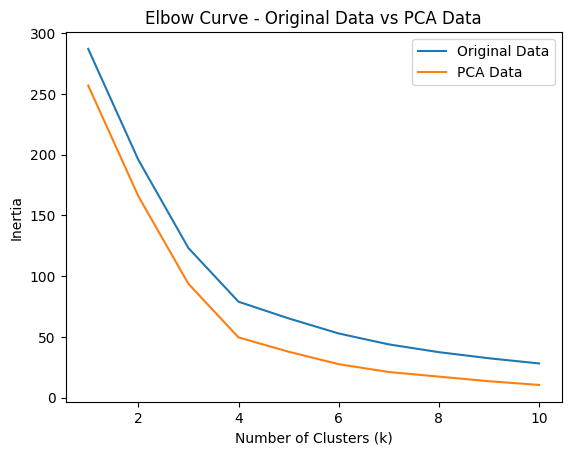

In [190]:
# Composite plot to contrast the Elbow curves
plt.plot(df_elbow['k'], df_elbow['inertia'], label='Original Data')
plt.plot(df_pca_elbow['k_pca'], df_pca_elbow['inertia_pca'], label='PCA Data')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve - Original Data vs PCA Data')

plt.legend()

plt.show()

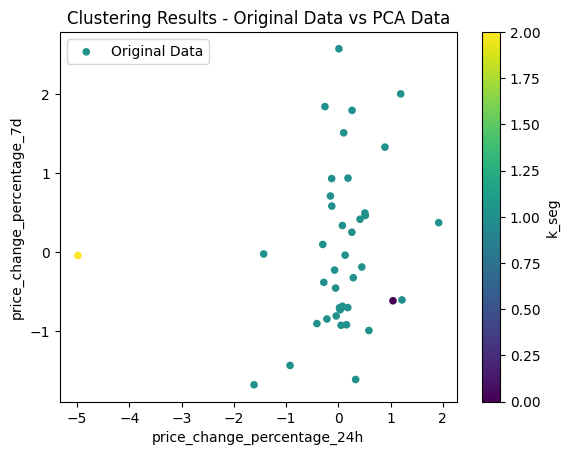

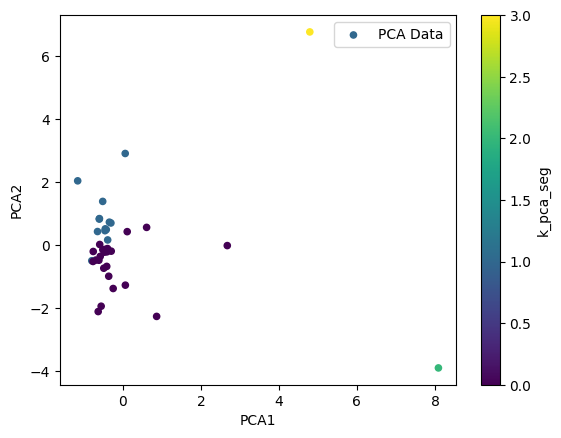

In [194]:
# Composite plot to contrast the clusters
scatter_plot = market_data_k_df.plot.scatter(
    "price_change_percentage_24h",
    "price_change_percentage_7d",
    c='k_seg',
    cmap="viridis",
    label='Original Data')


plt.title('Clustering Results - Original Data vs PCA Data')

market_data_k_pca_df.plot.scatter(
    "PCA1",
    "PCA2",
    c='k_pca_seg',
    cmap="viridis",
    label='PCA Data')


plt.legend()

plt.show()

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Observing hte line plots, it seems that when we used fewer features the inertia drecreases faster, and the clusters become better separated.
  Furthermore, in the scatter plots, when using fewer features it seems tgat the clusters get closer in a group.
  Therefore, fewer features here mean better dfined clusters and sharper intertia line.